# Project 2E

### Scientific Question: What is the evolutionary relationship, inferred from Cytochrome B, of the feeding habits among different species of Darwin's finches?

The Cytochrome B gene (cytb) is responsible for providing instructions for making Cytochrome B protein. Cytochrome B is found in mitochondrial DNA.

The sequences of cytb for different species of Darwin's finches was sourced from the Nucleotide database of NCBI. National Center for Biotechnology Information, or NCBI, provides access to a series of databases containing biomedical and genomic information. Major databases are GenBank for DNA sequences and PubMed for biomedical literature. 

### Scientific Hypothesis: If Darwin's finches on the Galapagos Islands descended from a single common ancestor, then Cytochrome B can infer that species of Darwin's finches with similar feeding habits tend to be closely related to one another than to species with different feeding habits. 

To answer this scientific question and test my hypothesis, I started off by researching how many different species of Darwin's finches there are and listing down the scientic name of these species. I then found a FASTA file for each species that contained the sequence for the cytochrome B gene. I resorted to the Nucleotide database on NCBI (https://www.ncbi.nlm.nih.gov/nuccore) to find the FASTA files. In order to find each of the FASTA files, I searched for "scientific name of species + cytochrome B". For each species, I downloaded a FASTA file containing the sequence for cytochrome B so that it could be uploaded into my code.

### Defining the packages

- SeqIO: allows for reading and writing of sequence files
- AlignIO: works with alignment files that contain sequence alignments
- Phylo: contains distance calculator used for making phylogenetic trees
- Bio.Phylo.TreeConstruction: works with matplotlib to contruct trees
- DistanceCalculator: creates distance matrix
- DistanceTreeConstructor: constructs tree based on distance matrix 
- matplotlib: allows for visualization of data such as figures and graphs

In [18]:
# import packages
import Bio as Bio
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

### Part 1: Load in the data

FASTA file is a text-based format that contains nucleotide sequences. FASTA format begins with a single line of description, followed by the sequence. 

In the code below, I started by adding the location of where the FASTA files were stored. Each different finch species had one FASTA file, for a total of 15 finch species. Then, with SeqIO.read I read in the nucleotide sequences from each FASTA file. Using SeqIO.write, I combined all the individual FASTA files into one FASTA to make it easier when doing the multiple sequence alignment. 

In [19]:
# location of fasta files 
filename="/Users/shannon/Downloads/F1_Cactospiza_pallida.fasta"
filename2="/Users/shannon/Downloads/F2_Camarhynchus_parvulus.fasta"
filename3="/Users/shannon/Downloads/F3_Camarhynchus_pauper.fasta"
filename4="/Users/shannon/Downloads/F4_Camarhynchus_psittacula.fasta"
filename5="/Users/shannon/Downloads/F5_Platyspiza_crassirostris.fasta"
filename6="/Users/shannon/Downloads/F6_Geospiza_fuliginosa.fasta"
filename7="/Users/shannon/Downloads/F7_Geospiza_fortis.fasta"
filename8="/Users/shannon/Downloads/F8_Geospiza_magnirostris.fasta"
filename9="/Users/shannon/Downloads/F9_Geospiza_conirostris.fasta"
filename10="/Users/shannon/Downloads/F10_Geospiza_scandens.fasta"
filename11="/Users/shannon/Downloads/F11_Geospiza_difficilis.fasta"
filename12="/Users/shannon/Downloads/F12_Pinaroloxias_inornata.fasta"
filename13="/Users/shannon/Downloads/F13_Certhidea_olivacea.fasta"
filename14="/Users/shannon/Downloads/F14_Cactospiza_heliobates.fasta"
filename15="/Users/shannon/Downloads/F15_Certhidea_fusca.fasta"
filename16="/Users/shannon/Downloads/finches_aln.clw"

In [20]:
# SeqIO.read is used to read the sequence in the fasta files
# read in sequences from FASTA files
f1 = SeqIO.read(filename, "fasta")
f2 = SeqIO.read(filename2, "fasta")
f3 = SeqIO.read(filename3, "fasta")
f4 = SeqIO.read(filename4, "fasta")
f5 = SeqIO.read(filename5, "fasta")
f6 = SeqIO.read(filename6, "fasta")
f7 = SeqIO.read(filename7, "fasta")
f8 = SeqIO.read(filename8, "fasta")
f9 = SeqIO.read(filename9, "fasta")
f10 = SeqIO.read(filename10, "fasta")
f11 = SeqIO.read(filename11, "fasta")
f12 = SeqIO.read(filename12, "fasta")
f13 = SeqIO.read(filename13, "fasta")
f14 = SeqIO.read(filename14, "fasta")
f15 = SeqIO.read(filename15, "fasta")

In [21]:
# combine all individual sequences into one fasta file
finches = SeqIO.write([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15], "finches_fasta", "fasta")

### Part 2: Perform multiple sequence alignment 

MUSCLE is an online tool (https://www.ebi.ac.uk/Tools/msa/muscle/) that performs multiple sequence alignment. Multiple seq alignment is the alignment of three or more biological sequences. The output of multiple seq alignment can be used to infer evolutionary relationships between the sequences studied. In this project, I used sequences of Cytochrome B from different species of Darwin's finches for the sequence alignment. In MUSCLE, I uploaded the finches_fasta file I created earlier containing all the sequences. From MUSCLE, I downloaded the file (finches_aln.clw) containing the multiple sequence alignment data. I read in the multiple sequence alignment file type with AlignIO.read.

In [22]:
# read the multiple sequence alignment file with AlignIO.read
with open(filename16, "r") as aln: 
    alignment = AlignIO.read(aln, "clustal")
    
# print the type of alignment, here we are using multiple seq alignment    
print(type(alignment))

<class 'Bio.Align.MultipleSeqAlignment'>


### Part 3: Data for phylogenetic tree

In this part of the code we are using DistanceCalculator to create a distance matrix, which is required to be able to construct the phylogenetic tree. 

In [23]:
# import package
from Bio.Phylo.TreeConstruction import DistanceCalculator 

# 'identity' is the type of tree model I am using, there are several other models in Bio.Phylo
calculator = DistanceCalculator ('identity')

In [24]:
# distance matrix 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

Certhidea_olivacea	0
Certhidea_fusca	0.024651661307609873	0
Pinaroloxias_inornata	0.03429796355841375	0.052518756698821	0
Platyspiza_crassirostris	0.030010718113612	0.048231511254019255	0.027867095391211127	0
Cactospiza_heliobates	0.09539121114683813	0.0986066452304395	0.08788853161843513	0.0911039657020365	0
Camarhynchus_pauper	0.03429796355841375	0.052518756698821	0.02357984994640938	0.027867095391211127	0.082529474812433	0
Geospiza_difficilis	0.03108252947481238	0.04930332261521975	0.024651661307609873	0.024651661307609873	0.0836012861736335	0.020364415862808127	0
Geospiza_fuliginosa	0.026795284030010746	0.045016077170418	0.020364415862808127	0.022508038585209	0.07931404072883175	0.01607717041800638	0.012861736334405127	0
Geospiza_fortis	0.026795284030010746	0.045016077170418	0.020364415862808127	0.020364415862808127	0.07931404072883175	0.01607717041800638	0.010718113612004254	0.008574490889603381	0
Geospiza_conirostris	0.02357984994640938	0.04180064308681675	0.017148981779206873	0.

### Part 4: Constructing the phylogenetic tree

To construct the tree, we need to use DistanceTreeConstructor. This module uses the data from distance matrix to build the phylogenetic tree. A summary of the tree is printed but is not yet a visual phylogenetic tree. Then I wrote a new file in XML format to use it with matplotlib. Finally, I used matplotlib to create a phylogenetic tree. The initial tree is hard to read, so the figure size was changed and the size of the font. A phylogenetic tree is a branching diagram that shows the evolutionary relationship between different species based on genetic differences. The phylogenetic tree of Darwin's finches shows the evolution of the species based on the gene Cytochrome B. 

In [25]:
# DistanceTreeConstructor is a module needed for building the tree
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)

In [26]:
# building the tree
finches_tree = constructor.build_tree(alignment)
finches_tree.rooted = True

# prints summary of tree
print(finches_tree)

Tree(rooted=True)
    Clade(branch_length=0, name='Inner13')
        Clade(branch_length=1.734723475976807e-18, name='Inner12')
            Clade(branch_length=0.00034331457663452046, name='Inner11')
                Clade(branch_length=0.0007284967845659152, name='Inner9')
                    Clade(branch_length=0.0010651125401929338, name='Geospiza_scandens')
                    Clade(branch_length=0.0010785101822079392, name='Geospiza_magnirostris')
                Clade(branch_length=0.0005945203644158537, name='Inner10')
                    Clade(branch_length=0.004592879153269013, name='Geospiza_fuliginosa')
                    Clade(branch_length=0.0014360597534834093, name='Inner8')
                        Clade(branch_length=0.0008820114326545049, name='Inner6')
                            Clade(branch_length=0.07249799035369778, name='Cactospiza_heliobates')
                            Clade(branch_length=0.001992899249732061, name='Inner2')
                                Cla

In [27]:
# writing new file
Phylo.write(finches_tree, "finches_tree.xml", "phyloxml")

1

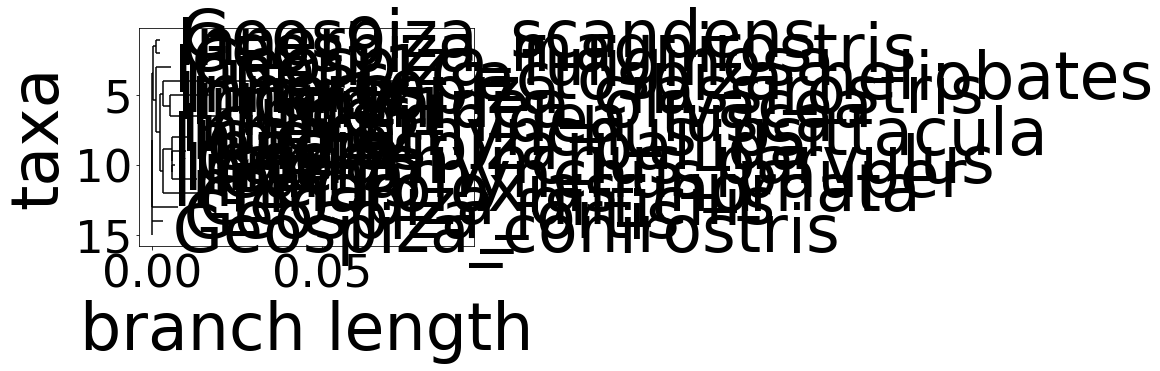

In [28]:
# import packages to visualize data
import matplotlib
import matplotlib.pyplot as plt 

# actually show the phylogenetic tree
fig = Phylo.draw(finches_tree)

In [29]:
# making tree easier to read

# create figure & set the size
fig = plt.figure(figsize=(150, 75), dpi=200)  

# fontsize of the node labels
matplotlib.rc('font', size=65) 

# fontsize of the labels
matplotlib.rc('xtick', labelsize=45)
matplotlib.rc('ytick', labelsize=45)
finches_tree.ladderize()
axes = fig.add_subplot(1, 1, 1)

# show the phylogenetic tree
Phylo.draw(finches_tree, axes=axes)

### Analysis of the results

The phylogenetic tree shows that Darwin's finches are apart of a monophyletic group, meaning that they are all descendants of a single common ancestor and are all related to each other. Finches with similar feeding habits appear to be closely related to one another. Finches of the genus Geospiza are ground finches, genus Camarhynchus are tree finches, and genus Certhidea are Warbler finches. Finch species belonging to these genus appear to be grouped together within the same monophyletic group, implying they are most closely related to each other. Finch species within the same genus share similar feeding habits. For example, the four finch species belonging to the Camarhynchus genus can be seen in the bottom portion of the tree. These four finch species share a monophyletic group, implying these species are closely related to each other. In addition, the two Certhidea species are shown to be in the same monophyletic group. These two Certhidea species share similar feeding habits and are more closely related to each other than to other finch species in the Geospiza and Camarhynchus genus. My hypothesis was correct and species with similar feeding habits are more closely related to one another than to species with different feeding habits. 